# Dataset Exploration

## Introduction

In [ ]:
import pandas as pd

In [ ]:
PATH = '../gaming/playstation/'
df_achievements = pd.read_csv(PATH + 'achievements.csv')
df_games = pd.read_csv(PATH + 'games.csv')
df_history = pd.read_csv(PATH + 'history.csv')
df_players = pd.read_csv(PATH + 'players.csv')
df_prices = pd.read_csv(PATH + 'prices.csv')
df_purchased_games = pd.read_csv(PATH + 'purchased_games.csv')

In [ ]:
''' Used to calculate the total sells of each game... not required anymore
def calculate_purchases(df_purchased_games):
    df_purchased_games['library'] = df_purchased_games['library'].apply(ast.literal_eval)
    exploded = df_purchased_games.explode('library')
    game_counts = exploded['library'].value_counts().reset_index()
    game_counts.columns = ['game_id', 'sales']
    result_df = game_counts.reset_index(drop=True)
    return result_df

def attach_game_information(df_purchases, df_games):
    merged_df = pd.merge(
        df_purchases, 
        df_games, 
        left_on='game_id', 
        right_on='gameid',
        how='inner'
    )
    merged_df.drop(columns=['gameid'], inplace=True)
    return merged_df

def attach_game_price(df_games, df_prices):
    merged_df = pd.merge(
        df_games, 
        df_prices, 
        left_on='game_id', 
        right_on='gameid',
        how='inner'
    )
    merged_df.drop(columns=['gameid'], inplace=True)
    return merged_df

def merge_dataset(folder):
    df_games = pd.read_csv('../gaming/' + folder + '/games.csv')
    df_prices = pd.read_csv('../gaming/' + folder + '/prices.csv')
    df_purchased_games = pd.read_csv('../gaming/' + folder + '/purchased_games.csv')

    df_sum_purchased = calculate_purchases(df_purchased_games)
    df_games_with_sales = attach_game_information(df_sum_purchased, df_games)
    df_games_with_sales_and_price = attach_game_price(df_games_with_sales, df_prices)

    return df_games_with_sales_and_price

merge_dataset('playstation').head()
'''

,game_id,sales,title,platform,developers,publishers,genres,supported_languages,release_date,usd,eur,gbp,jpy,rub,date_acquired
0,7779,30721,Grand Theft Auto V,PS4,['rockstar north'],['Rockstar Games'],['Action'],"['Japanese', 'French', 'Spanish', 'German', 'I...",2022-03-15,19.79,19.79,16.49,NaN,2849.0,2025-02-22
1,7779,30721,Grand Theft Auto V,PS4,['rockstar north'],['Rockstar Games'],['Action'],"['Japanese', 'French', 'Spanish', 'German', 'I...",2022-03-15,19.79,19.79,16.49,NaN,2849.0,2025-02-24
2,16508,26571,Horizon Zero Dawn,PS4,['Guerrilla Games'],['Sony Interactive Entertainment'],"['Open World', 'Action-RPG', 'Role Playing']","['Japanese', 'French', 'Spanish', 'German', 'I...",2017-02-28,NaN,NaN,NaN,NaN,NaN,2025-02-22
3,16508,26571,Horizon Zero Dawn,PS4,['Guerrilla Games'],['Sony Interactive Entertainment'],"['Open World', 'Action-RPG', 'Role Playing']","['Japanese', 'French', 'Spanish', 'German', 'I...",2017-02-28,NaN,NaN,NaN,NaN,NaN,2025-02-24
4,333860,26142,Call of Duty Modern Warfare,PS4,['Infinity Ward'],['Activision'],"['Battle Royale', 'First Person Shooter']","['Japanese', 'French', 'Spanish', 'German', 'I...",2019-10-25,59.99,59.99,49.99,NaN,NaN,2025-02-22


## Transformation to target dataset

In [47]:
# Get the sum of purchased games
def sum_games(str_list):
    list = eval(str_list)
    return len(list)

purchased_games = df_purchased_games['library'].apply(sum_games)
purchased_games

df1 = df_purchased_games.copy()
df1['purchased_games'] = purchased_games
df1.head()

,playerid,library,purchased_games
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172


In [ ]:
# Get the sum of the most highest achievements for each player
platinum_achievements = set(df_achievements[df_achievements['rarity'].str.strip() == 'Platinum']['achievementid'].astype(str).str.strip())

def high_achievements(playerId):
    achievement_ids = df_history[df_history['playerid'] == playerId]['achievementid']   
    platinum_count = sum(achievement_id in platinum_achievements for achievement_id in achievement_ids)
    return platinum_count

df1['highest_achievements'] = df1['playerid'].apply(high_achievements)
df1.head()

,playerid,library,purchased_games,highest_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0


In [101]:
# Get the sum of the medium achievements for each player
medium_achievements_data = set(df_achievements[df_achievements['rarity'].str.strip().isin(['Gold', 'Silver'])]['achievementid'].astype(str).str.strip())

def medium_achievements(playerId):
    achievement_ids = df_history[df_history['playerid'] == playerId]['achievementid']   
    medium_count = sum(achievement_id in medium_achievements_data for achievement_id in achievement_ids)
    return medium_count

df1['medium_achievements'] = df1['playerid'].apply(medium_achievements)
df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0


In [ ]:
# Get the sum of the lowest achievements for each player
lowest_achievements_data = set(df_achievements[df_achievements['rarity'].str.strip() == 'Bronze']['achievementid'].astype(str).str.strip())

def lowest_achievements(playerId):
    achievement_ids = df_history[df_history['playerid'] == playerId]['achievementid']   
    lowest_count = sum(achievement_id in lowest_achievements_data for achievement_id in achievement_ids)
    return lowest_count

df1['lowest_achievements'] = df1['playerid'].apply(lowest_achievements)
df1.head()

,playerid,library,purchased_games,highest_achievements,medium_achievements,lowest_achievements
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,357,2056
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0


In [ ]:
# Get the most played genre by each player
def clean_genre(genre):
    if isinstance(genre, list):
        return genre
    elif isinstance(genre, str):
        try:
            return eval(genre) if genre.startswith('[') and genre.endswith(']') else [genre]
        except:
            return [genre]
    else:
        return []

game_genres_dict = df_games.set_index('gameid')['genres'].apply(clean_genre).to_dict()


def greatest_genre(library_str):
    library_list = eval(library_str)

    all_genres = []
    for game_id in library_list:
        all_genres.extend(game_genres_dict.get(game_id, []))
    
    genre_series = pd.Series(all_genres)
    most_common_genre = genre_series.mode()[0] if not genre_series.empty else None
    return most_common_genre

df1['most_played_genre'] = df1['library'].apply(greatest_genre)
df1.head()



,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442,Role Playing
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action


Before putting the money spent for each player, we are going to fill null values with the average (price)

In [130]:
df_prices['usd'] = df_prices['usd'].fillna(df_prices['usd'].mean())

In [ ]:
# Get the total spent money in us
df1['library'] = df1['library'].apply(lambda x: [str(i).strip() for i in eval(x)])
df_prices['gameid'] = df_prices['gameid'].astype(str).str.strip()

library_expanded = df1[['playerid', 'library']].explode('library')
library_with_prices = library_expanded.merge(df_prices[['gameid', 'usd']], how='left', left_on='library', right_on='gameid')
total_spent_df = library_with_prices.groupby('playerid')['usd'].sum().reset_index()
df1 = df1.merge(total_spent_df[['playerid', 'usd']], on='playerid', how='left')

df1['total_spent_us'] = df1['usd']
df1.drop('usd', axis=1, inplace=True)

df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442,Role Playing,7140.931374
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478


In [ ]:
# Getting a score of how fast a player is doing his first achievement on all of its games
df1['library'] = df1['library'].apply(lambda x: [str(i).strip() for i in x])

library_expanded = df1[['playerid', 'library']].explode('library')

library_expanded['library'] = library_expanded['library'].astype(str)
df_games['gameid'] = df_games['gameid'].astype(str)

library_with_release_dates = library_expanded.merge(df_games[['gameid', 'release_date']], how='left', left_on='library', right_on='gameid')
library_with_release_dates.dropna(inplace=True)

df_history['gameid'] = df_history['achievementid'].apply(lambda x: x.split('_')[0])

first_achievements = df_history.groupby(['playerid', 'gameid'])['date_acquired'].min().reset_index()

library_with_achievements = library_with_release_dates.merge(first_achievements[['playerid', 'gameid', 'date_acquired']], how='left', on=['playerid', 'gameid'])

library_with_achievements['release_date'] = pd.to_datetime(library_with_achievements['release_date'])
library_with_achievements['date_acquired'] = pd.to_datetime(library_with_achievements['date_acquired'])

library_with_achievements['time_to_first_achievement'] = (library_with_achievements['date_acquired'] - library_with_achievements['release_date']).dt.days

mean_time_to_first_achievement = library_with_achievements.groupby('playerid')['time_to_first_achievement'].mean().reset_index()

df1 = df1.merge(mean_time_to_first_achievement[['playerid', 'time_to_first_achievement']], on='playerid', how='left')

df1['achievement_rate'] = df1['time_to_first_achievement']
df1.drop('time_to_first_achievement', axis=1, inplace=True)

df1['achievement_rate'] = df1['achievement_rate'].fillna('Nothing')

df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,Nothing
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,Nothing
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,Nothing
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442,Role Playing,7140.931374,229.981308
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,Nothing


Finishing the details of the dataset

In [ ]:
# Put a label to the achievement rate
def define_achievement_label(achievement_value):
    if isinstance(achievement_value, float):
        value = float(achievement_value)
        if value >= 0 and value <= 3:
            return 'Extreme'
        if value > 3 and value <= 6:
            return 'High'
        if value > 6 and value <= 31:
            return 'Low'
        else:
            return 'Casual'
    else:
        return 'Empty'


df1['achievement_rate'] = df1['achievement_rate'].apply(define_achievement_label)
df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,None
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,None
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,None
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442,Role Playing,7140.931374,Casual
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,None


In [ ]:
# Add a date to the last achievement activity of each player
df_history['date_acquired'] = pd.to_datetime(df_history['date_acquired'])

last_achievement = df_history.groupby('playerid')['date_acquired'].max().reset_index()
df1 = df1.merge(last_achievement, on='playerid', how='left')
df1.rename(columns={'date_acquired': 'last_achievement_date'}, inplace=True)
df1['last_achievement_date'] = df1['last_achievement_date'].fillna('Empty')

df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,None,None
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,None,None
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,None,None
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442,Role Playing,7140.931374,Casual,2024-11-28 10:23:24
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,None,None


In [225]:
library_with_release_dates

,playerid,library,gameid,release_date
0,268071,14972,14972,2016-11-11
1,268071,417905,417905,2020-11-12
2,268071,14693,14693,2016-10-25
3,268071,7742,NaN,NaN
4,268071,20162,20162,2017-10-27
...,...,...,...,...
10893547,308899,255,255,2009-10-06
10893548,308899,3024,NaN,NaN
10893549,308899,3014,3014,2009-09-03
10893550,308899,334,334,2011-06-14


In [227]:
# Add a date in which the player got its most old game (possible date when player started to play)
library_expanded = df1[['playerid', 'library']].explode('library')
library_with_release_dates = library_expanded.merge(df_games[['gameid', 'release_date']], how='left', left_on='library', right_on='gameid')
library_with_release_dates.dropna(inplace=True)
oldest_game_dates = library_with_release_dates.groupby('playerid')['release_date'].min().reset_index()
df1 = df1.merge(oldest_game_dates[['playerid', 'release_date']], on='playerid', how='left')
df1.rename(columns={'release_date': 'started_played_on'}, inplace=True)

df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,oldest_game_date,started_played_on
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,None,None,2012-08-14,2012-08-14
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,None,None,2009-11-17,2009-11-17
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,None,None,2009-11-10,2009-11-10
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07,2012-02-07
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,None,None,2012-05-15,2012-05-15


In [230]:
df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,None,None,2012-08-14
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,None,None,2009-11-17
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,None,None,2009-11-10
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,None,None,2012-05-15


In [239]:
# Adding the country value for each player
df1 = df1.merge(df_players[['playerid', 'country', 'nickname']], on='playerid', how='left')
df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,"[14972, 417905, 14693, 7742, 20162, 461983, 12...",231,0,0,0,Action,9794.040024,None,None,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,"[410618, 17456, 16034, 138931, 175202, 331007,...",867,0,0,0,Indie,24707.549618,None,None,2009-11-17,Hong Kong,Kevins_J
2,253885,"[417808, 706747, 619583, 492711, 555631, 18167...",50,0,0,0,shooter,1671.651601,None,None,2009-11-10,France,sebneau
3,1911732,"[670209, 694794, 658551, 582894, 602666, 65531...",137,19,2056,442,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,"[19362, 170350, 12653, 20230, 12750, 18141, 41...",172,0,0,0,Action,6010.800478,None,None,2012-05-15,United States,Kidokyalu


In [255]:
df1.drop(columns=['library'], inplace=True)
df1.shape

(46582, 12)

In [247]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46582 entries, 0 to 46581
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   playerid               46582 non-null  int64  
 1   library                46582 non-null  object 
 2   purchased_games        46582 non-null  int64  
 3   highest_achievements   46582 non-null  int64  
 4   lowest_achievements    46582 non-null  int64  
 5   medium_achievements    46582 non-null  int64  
 6   most_played_genre      46569 non-null  object 
 7   total_spent_us         46582 non-null  float64
 8   achievement_rate       46582 non-null  object 
 9   last_achievement_date  46582 non-null  object 
 10  started_played_on      46569 non-null  object 
 11  country                46582 non-null  object 
 12  nickname               46582 non-null  object 
dtypes: float64(1), int64(5), object(7)
memory usage: 4.6+ MB


In [ ]:
# Exporting because the generation of this dataset took around 2 hours...
df1.to_csv('gamers_profile.csv', index=False)

## Data Engineering

In [24]:
df1 = pd.read_csv('gamers_profile.csv')
df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,"['14972', '417905', '14693', '7742', '20162', ...",231,0,0,0,Action,9794.040024,NaN,NaN,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,"['410618', '17456', '16034', '138931', '175202...",867,0,0,0,Indie,24707.549618,NaN,NaN,2009-11-17,Hong Kong,Kevins_J
2,253885,"['417808', '706747', '619583', '492711', '5556...",50,0,0,0,shooter,1671.651601,NaN,NaN,2009-11-10,France,sebneau
3,1911732,"['670209', '694794', '658551', '582894', '6026...",137,19,2056,442,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,"['19362', '170350', '12653', '20230', '12750',...",172,0,0,0,Action,6010.800478,NaN,NaN,2012-05-15,United States,Kidokyalu


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Numerical Values

In [26]:
def draw_numerical(column_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    sns.histplot(df1[column_name], color='skyblue', bins=20, ax=axes[0])
    sns.boxplot(x=df1[column_name], color='lightgreen', ax=axes[1]) 

    plt.tight_layout()
    plt.show()

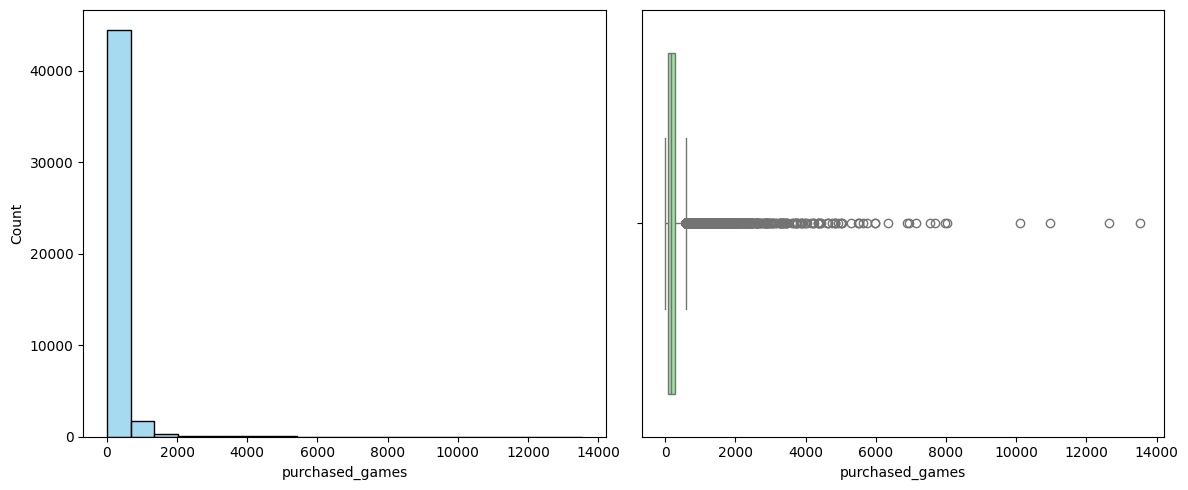

In [27]:
draw_numerical('purchased_games')

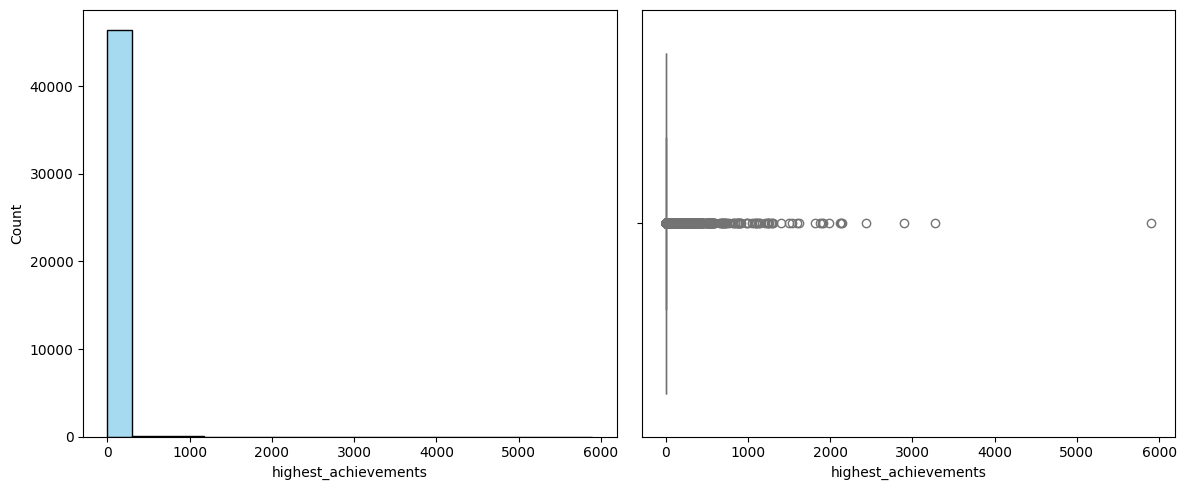

In [28]:
draw_numerical('highest_achievements')

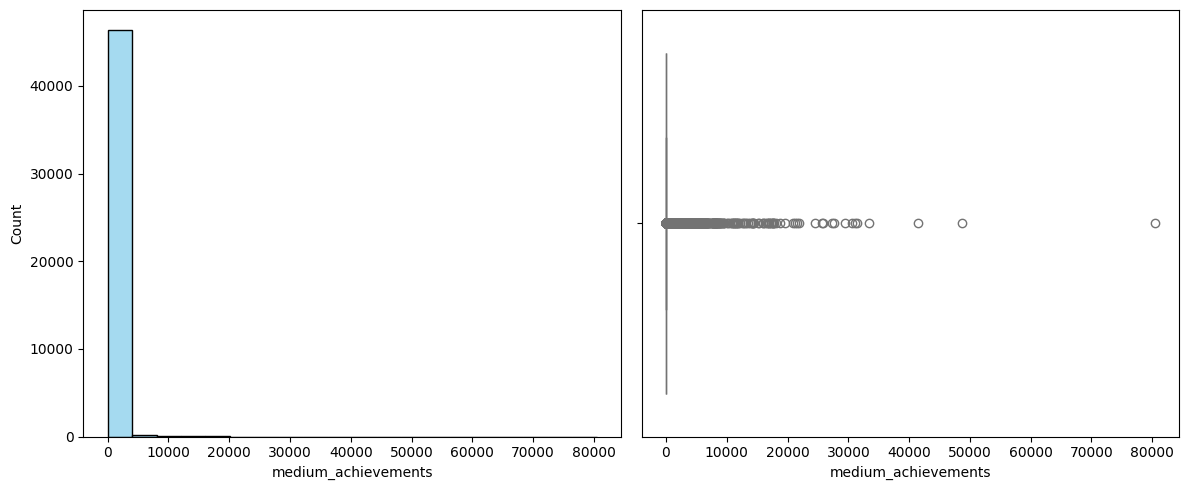

In [29]:
draw_numerical('medium_achievements')

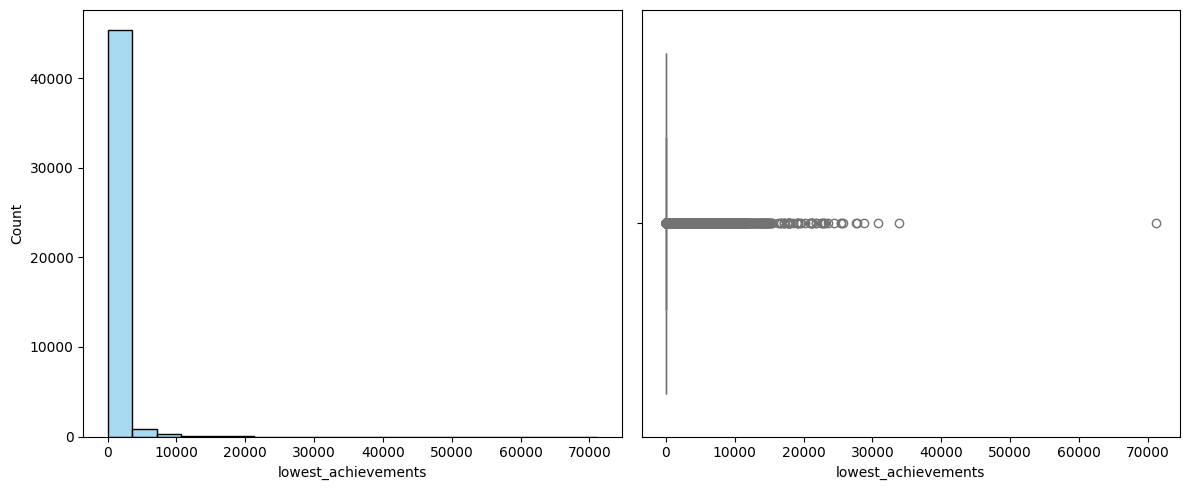

In [30]:
draw_numerical('lowest_achievements')

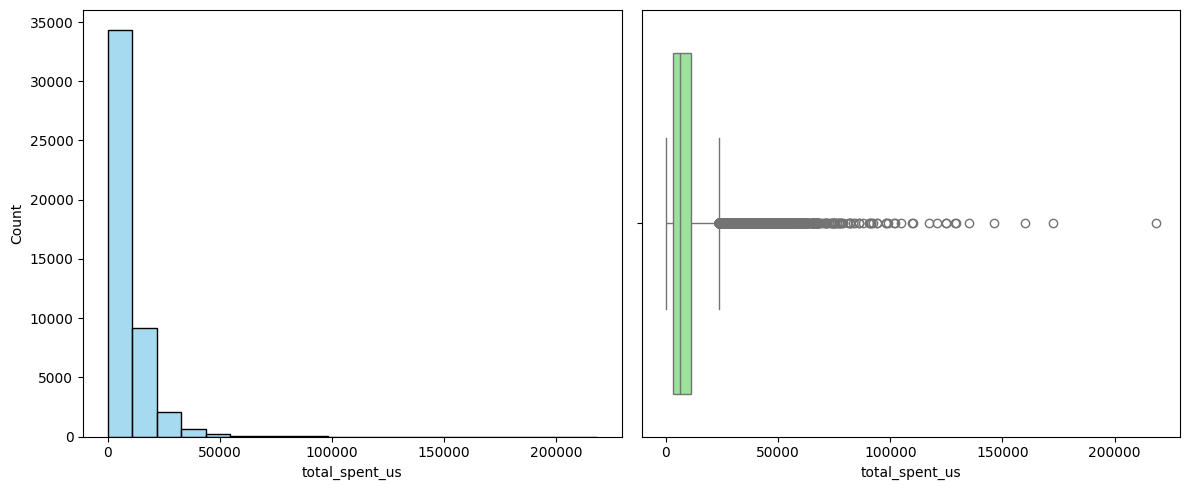

In [31]:
draw_numerical('total_spent_us')

### Categorical Values

#### Genre

In [32]:
sorted_arr = np.sort([x for x in df1['most_played_genre'].unique() if x is not None])
print(sorted(sorted_arr))

['ARCADE', 'Action', 'Action Horror', 'Action-Adventure', 'Action-RPG', 'Adventure', 'Arcade Racing', 'Automobile', 'Baseball', 'Basketball', 'Battle Royale', "Beat 'em up", 'Classics', 'Collection', 'Cue Sports', 'Cycling', 'Dungeon Crawler', 'Educational & Trivia', 'Equestrian Sports', 'FPS', 'Family', 'Fighting', 'First Person Shooter', 'Football', 'Free to Play', 'Hack & Slash', 'Indie', 'Mech', 'Music & Rhythm', 'Music+', 'Open World', 'Party', 'Platformer', 'Puzzle', 'RPG', 'Racing', 'Roguelite', 'Role Playing', 'Role-Playing Games (RPG)', "Shoot 'em up", 'Simulation', 'Simulation Racing', 'Sports', 'Stealth', 'Survival Horror', 'Third Person Shooter', 'Visual Novel', 'fighting', 'nan', 'platformer', 'puzzle', 'shooter', 'sports', 'strategy']


In [33]:
def clean_genre(genre):
    genre_lower = str(genre).lower()
    if genre_lower == 'action horror':
        return 'horror'
    elif genre_lower == 'action-adventure':
        return 'adventure'
    elif genre_lower == 'action-rpg':
        return 'rpg'
    elif genre_lower == 'arcade racing':
        return 'racing'
    elif genre_lower == 'educational & trivia':
        return 'educational'
    elif genre_lower == 'equestrian sports':
        return 'sports'
    elif genre_lower == 'first person shooter':
        return 'shooter'
    elif genre_lower == 'music & rhythm':
        return 'music'
    elif genre_lower == 'music+':
        return 'music'
    elif genre_lower == 'role playing':
        return 'rpg'
    elif genre_lower == 'role-playing games (rpg)':
        return 'rpg'
    elif genre_lower == 'shoot \'em up':
        return 'shooter'
    elif genre_lower == 'simulation racing':
        return 'racing'
    elif genre_lower == 'survival horror':
        return 'horror'
    elif genre_lower == 'third person shooter':
        return 'shooter'
    else:
        return genre_lower
    
df2 = df1.copy()
df2['most_played_genre'] = df2['most_played_genre'].apply(clean_genre)

print(df2['most_played_genre'].unique())
df2.head()

['action' 'indie' 'shooter' 'rpg' 'sports' 'free to play' 'adventure'
 'fighting' 'open world' 'football' 'platformer' 'racing' 'simulation'
 'automobile' 'party' 'puzzle' 'hack & slash' 'stealth' 'strategy' 'music'
 'nan' 'visual novel' 'cue sports' 'battle royale' 'horror' 'baseball'
 'mech' "beat 'em up" 'collection' 'fps' 'roguelite' 'family' 'classics'
 'arcade' 'educational' 'basketball' 'dungeon crawler' 'cycling']


,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,"['14972', '417905', '14693', '7742', '20162', ...",231,0,0,0,action,9794.040024,NaN,NaN,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,"['410618', '17456', '16034', '138931', '175202...",867,0,0,0,indie,24707.549618,NaN,NaN,2009-11-17,Hong Kong,Kevins_J
2,253885,"['417808', '706747', '619583', '492711', '5556...",50,0,0,0,shooter,1671.651601,NaN,NaN,2009-11-10,France,sebneau
3,1911732,"['670209', '694794', '658551', '582894', '6026...",137,19,2056,442,rpg,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,"['19362', '170350', '12653', '20230', '12750',...",172,0,0,0,action,6010.800478,NaN,NaN,2012-05-15,United States,Kidokyalu


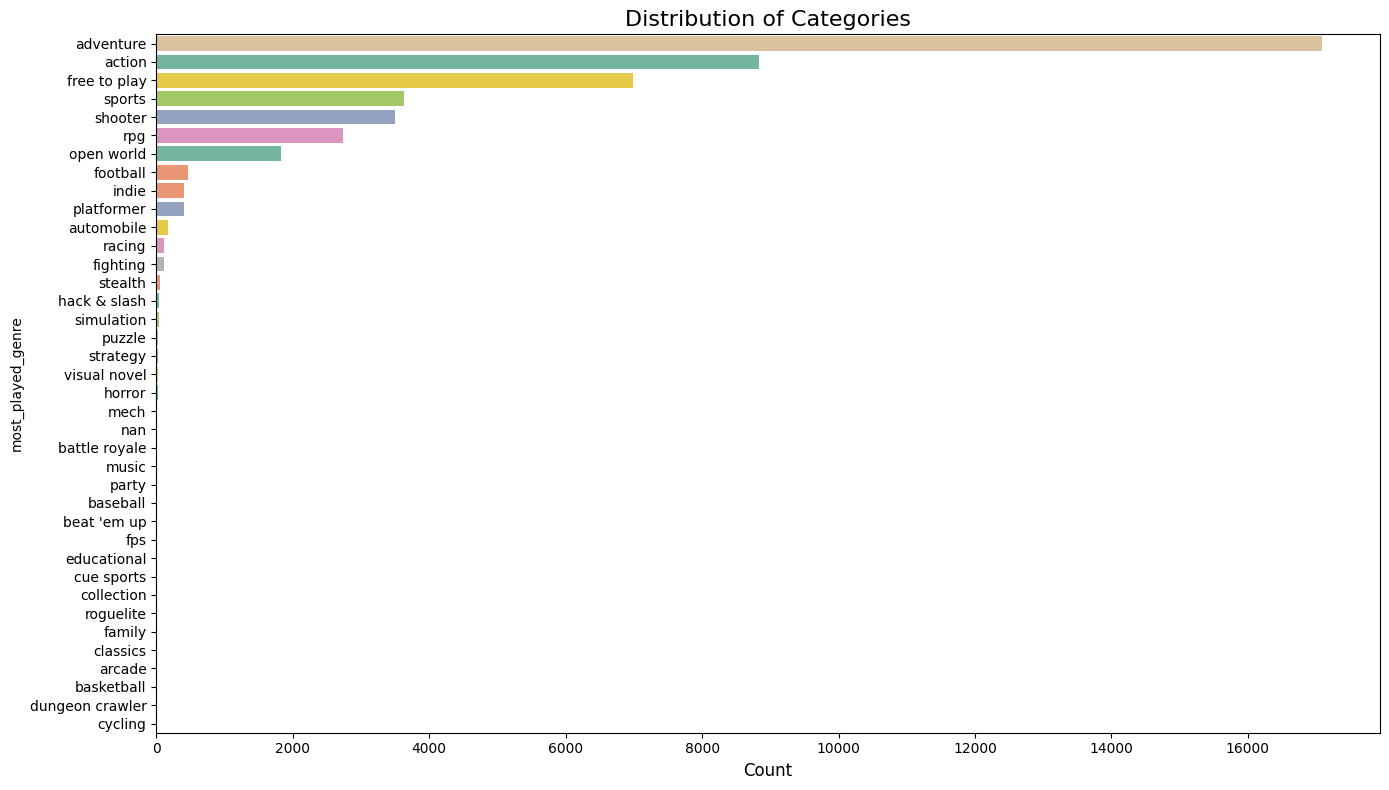

In [34]:
plt.figure(figsize=(14, 8))
sns.countplot(y='most_played_genre', 
              data=df2, 
              palette='Set2', 
              order=df2['most_played_genre'].value_counts().index, 
              hue=df2['most_played_genre'])

plt.title('Distribution of Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

#### achievement_rate

In [35]:
df2['achievement_rate'].unique()

array([nan, 'Casual', 'Low', 'Extreme', 'High'], dtype=object)

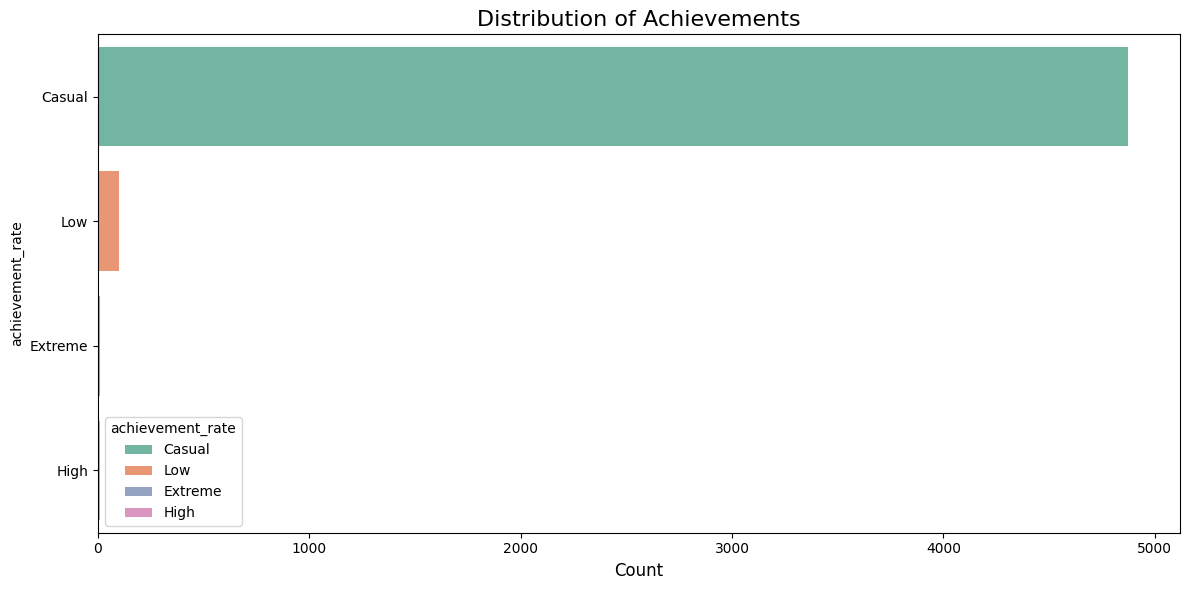

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(y='achievement_rate', 
              data=df2, 
              palette='Set2', 
              order=df2['achievement_rate'].value_counts().index, 
              hue=df2['achievement_rate'])

plt.title('Distribution of Achievements', fontsize=16)
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

Since achievement_rate is categorical ordinal I will change it to values 0 to 4

In [37]:
def number_achievement_rate(achievement_rate):
    achievement_rate = str(achievement_rate)
    if achievement_rate == 'Empty':
        return 0
    elif achievement_rate == 'Casual':
        return 1
    elif achievement_rate == 'Low':
        return 2
    elif achievement_rate == 'High':
        return 3
    elif achievement_rate == 'Extreme':
        return 4
    else:
        return -1
    
df3 = df2.copy()
df3['achievement_rate'] = df3['achievement_rate'].apply(number_achievement_rate)
df3.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,"['14972', '417905', '14693', '7742', '20162', ...",231,0,0,0,action,9794.040024,-1,NaN,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,"['410618', '17456', '16034', '138931', '175202...",867,0,0,0,indie,24707.549618,-1,NaN,2009-11-17,Hong Kong,Kevins_J
2,253885,"['417808', '706747', '619583', '492711', '5556...",50,0,0,0,shooter,1671.651601,-1,NaN,2009-11-10,France,sebneau
3,1911732,"['670209', '694794', '658551', '582894', '6026...",137,19,2056,442,rpg,7140.931374,1,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,"['19362', '170350', '12653', '20230', '12750',...",172,0,0,0,action,6010.800478,-1,NaN,2012-05-15,United States,Kidokyalu


#### Country

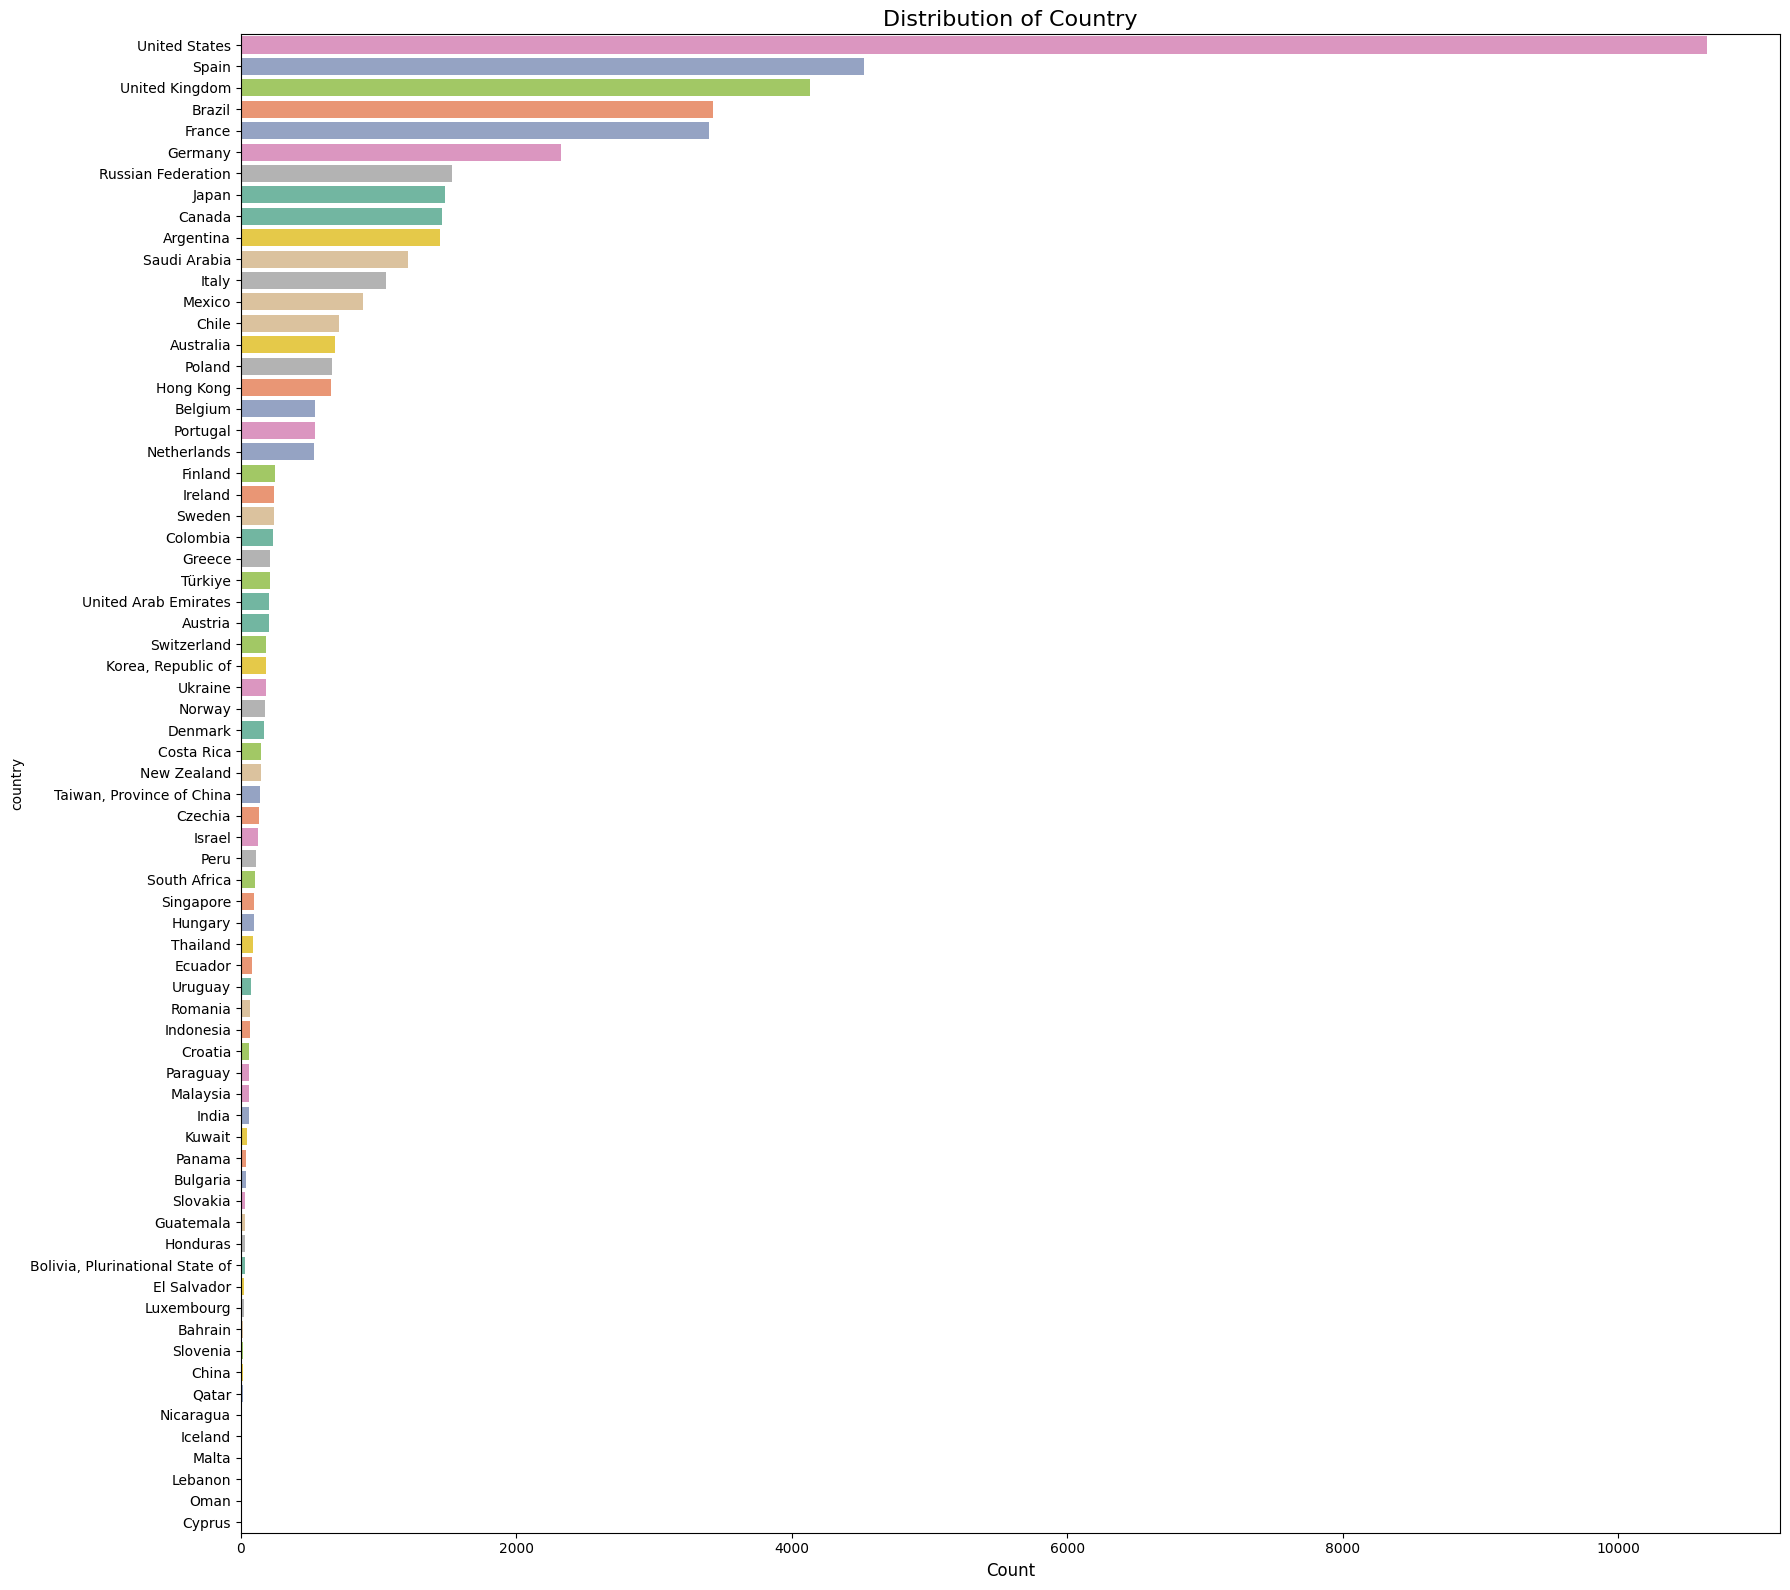

In [40]:
plt.figure(figsize=(18, 16))
sns.countplot(y='country', 
              data=df3, 
              palette='Set2', 
              order=df3['country'].value_counts().index, 
              hue=df3['country'])

plt.title('Distribution of Country', fontsize=16)
plt.xlabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

In [38]:
df1.head()

,playerid,library,purchased_games,highest_achievements,lowest_achievements,medium_achievements,most_played_genre,total_spent_us,achievement_rate,last_achievement_date,started_played_on,country,nickname
0,268071,"['14972', '417905', '14693', '7742', '20162', ...",231,0,0,0,Action,9794.040024,NaN,NaN,2012-08-14,United Arab Emirates,Miss_Hero2000
1,2218485,"['410618', '17456', '16034', '138931', '175202...",867,0,0,0,Indie,24707.549618,NaN,NaN,2009-11-17,Hong Kong,Kevins_J
2,253885,"['417808', '706747', '619583', '492711', '5556...",50,0,0,0,shooter,1671.651601,NaN,NaN,2009-11-10,France,sebneau
3,1911732,"['670209', '694794', '658551', '582894', '6026...",137,19,2056,442,Role Playing,7140.931374,Casual,2024-11-28 10:23:24,2012-02-07,United States,Eldorath02
4,3098524,"['19362', '170350', '12653', '20230', '12750',...",172,0,0,0,Action,6010.800478,NaN,NaN,2012-05-15,United States,Kidokyalu


Notes:
* Pearson Correlation (for continuous variables)
* Chi-Square Test (for categorical variables)
* Cramer's V (to measure association between categorical variables)
* ANOVA (Analysis of Variance) (to compare means of multiple groups)